## Import essential Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import os
from glob import glob

## Mount Google Drive to import dataset

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
train_images_path = '.../images/train'
val_images_path = '.../images/val'
os.listdir(train_images_path)

['b5094fa1-5e99-4714-ba76-d20ea5ba8805.jpeg',
 'ea87b005-a6da-47e4-ba24-24c98a9eefd2.jpeg',
 '7be43358-db01-42fb-b61a-cc37f4dcfdea.jpeg',
 '35487eaa-c710-4764-bb4b-3146d0725174.jpeg',
 '738842c8-f7cd-4917-8451-21cef5f67c79.jpeg',
 'ae50905b-c47a-40aa-ae6c-d93f966d32bc.jpeg',
 'fe209aee-1dbc-4214-b360-b662be2fc1e6.jpeg',
 'cb928d0d-81bf-40e6-b1a2-e594048526b6.jpeg',
 '6617569f-3cd6-45b1-87ab-77b0ae9bcb8a.jpeg',
 '70621157-8183-4b1c-9c11-d2d1993e3e18.jpeg',
 '358eaa75-57bd-4e1f-b006-4cc386987fc4.jpeg',
 '885073e3-6b67-4173-bb33-0eb170a41425.jpeg',
 'c5af939f-d8fd-41f4-b7ae-ad6345bf4ce6.jpeg',
 '52180a27-6059-4255-8ba4-4744f7cd5df8.jpeg',
 'b94db6ce-4e40-44f5-b4c3-49a211b84253.jpeg',
 '9d977cdf-8c1b-4c8d-8f2e-2ff4503a7214.jpeg',
 'c7450abf-421f-4ada-85aa-02c692151972.jpeg',
 '9137f540-7053-4d04-abe1-b701be42a825.jpeg',
 '53bb7229-edb0-4887-9dea-88b76f3f8dc1.jpeg',
 '862a5d1d-ef7a-4ba8-ab3b-9dea7540a66e.jpeg',
 '61fe01f7-db2e-4d09-8f01-bf95a286a746.jpeg',
 'd9705c50-e1e6-4b59-be92-4358ad42

## Plot sample of dataset

(480, 720, 3)


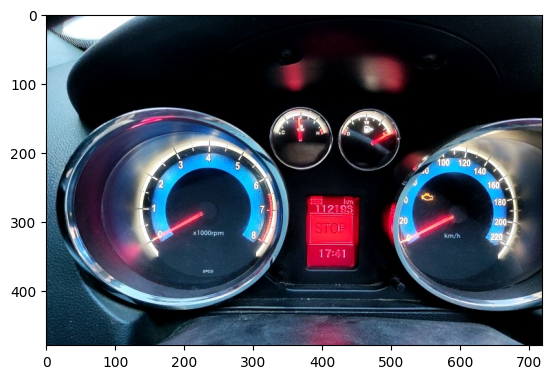

In [ ]:
images = glob(train_images_path+'/*')
sample_image = cv2.imread(images[0])
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
print(sample_image.shape)
plt.imshow(sample_image)

## Create ```.yaml``` file for YOLO. YOLO need this configuration file to train the model.

In [ ]:
import yaml

data = {'train': train_images_path,
'val': val_images_path,
'names': ['odometer']
}

# Write odometer_dataset.yaml file
with open('odometer_dataset.yaml', 'w') as file:
    yaml.dump(data, file)

## Install ```ultralytics``` library

In [ ]:
from IPython.display import clear_output, display, Image

!pip install ultralytics
clear_output()

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


## Train the model

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=odometer_dataset.yaml epochs=200 imgsz=640 plots=True batch=16 optimizer='AdamW' lr0=0.001 lrf=0.001

100% 21.5M/21.5M [00:00<00:00, 164MB/s]
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=odometer_dataset.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

### Result of model.

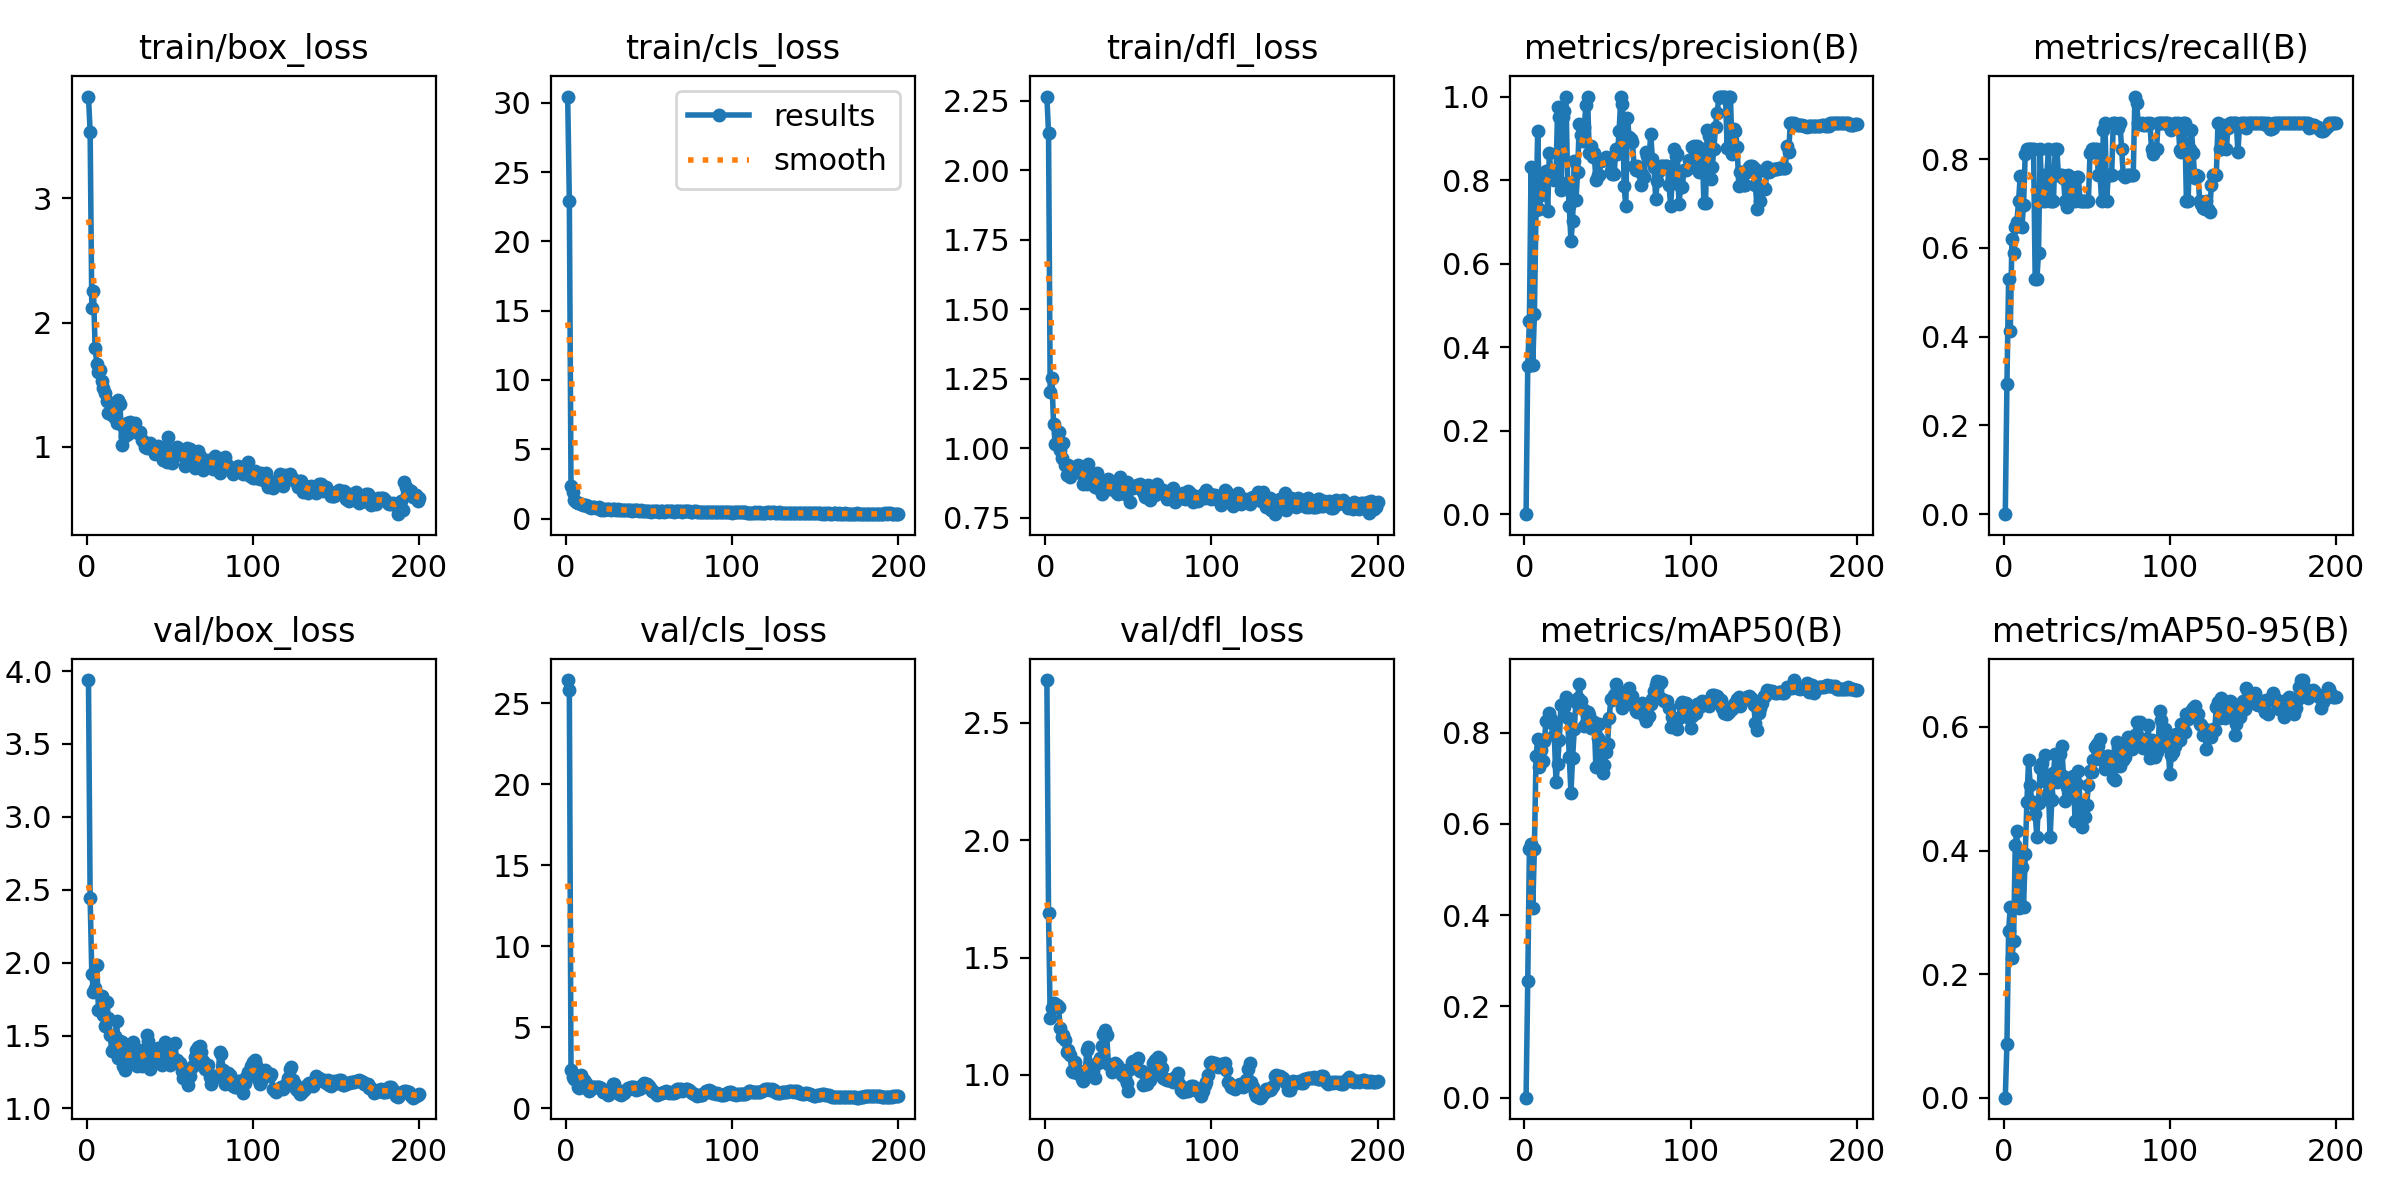

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

###  Sample of detection on ```validation```

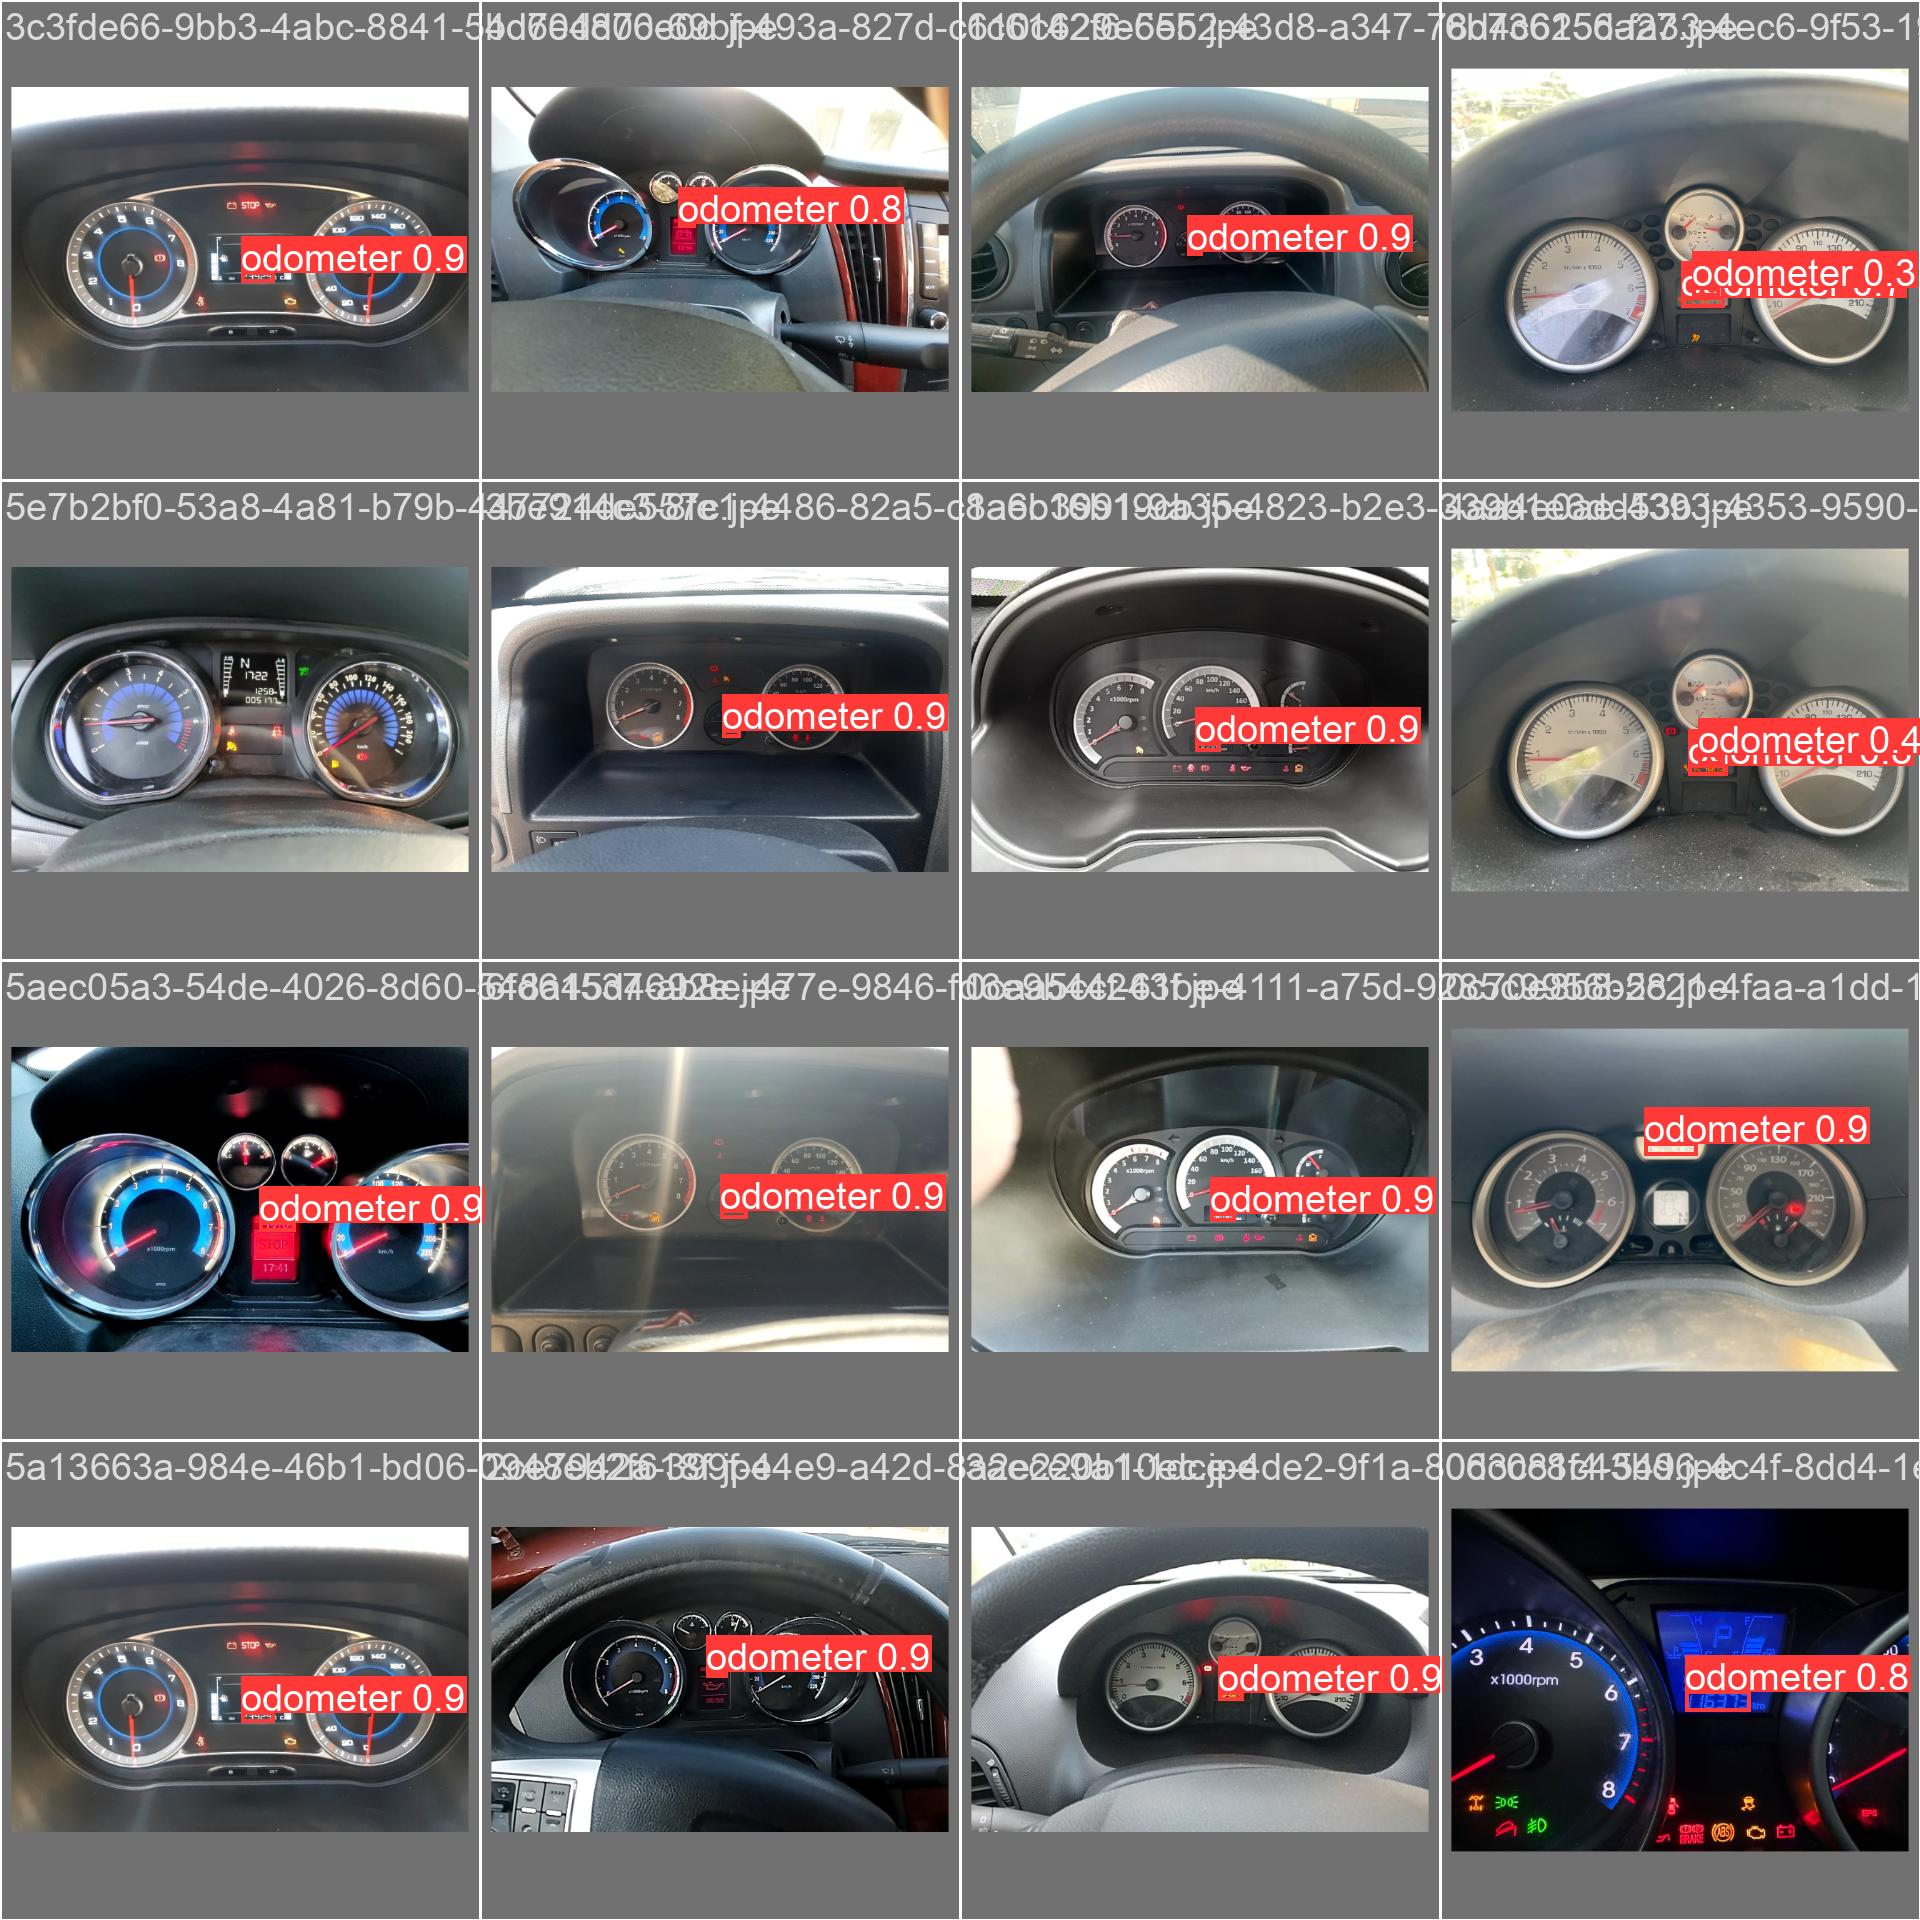

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

### Do detection on ```Validation set```

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=odometer_dataset.yaml

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/Interview/AZKI_DATASET/labels/val.cache... 17 images, 0 backgrounds, 0 corrupt: 100% 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:04<00:00,  2.19s/it]
                   all         17         17       0.93      0.882        0.9      0.667
Speed: 0.2ms preprocess, 35.7ms inference, 0.0ms loss, 139.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Zip weights of the model

In [ ]:
!zip -r odometer_detection_model.zip '/content/runs'

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/args.yaml (deflated 52%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 40%)
  adding: content/runs/detect/train/results.png (deflated 7%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 13%)
  adding: content/runs/detect/train/P_curve.png (deflated 21%)
  adding: content/runs/detect/train/results.csv (deflated 86%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 4%)
  adding: content/runs/detect/train/PR_curve.png (deflated 25%)
  adding: content/runs/detect/train/train_batch1330.jpg (deflated 11%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 6%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 14%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 4%)
  adding: content/runs/detect/train/F1_curve.png (deflated 19%)
  addin

In [ ]:
!cp '/content/odometer_detection_model.zip' '/content/drive/MyDrive/Colab Notebooks/Interview/AZKI_DATASET/'